In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2230, '18 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['median'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.000000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.011050
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.006650
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.000050
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.004750
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430


<IPython.core.display.Javascript object>


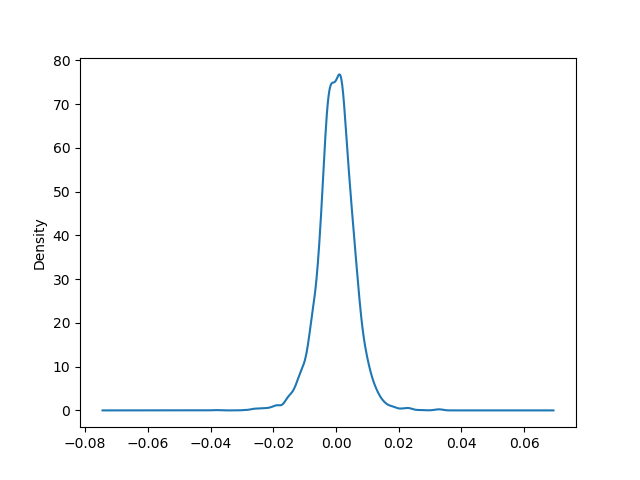

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()

In [8]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
ln=d['delta'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.000000,0.011050,0.006650,0.000050,-0.004750
1,0.011050,0.006650,0.000050,-0.004750,-0.003800
2,0.006650,0.000050,-0.004750,-0.003800,0.003550
3,0.000050,-0.004750,-0.003800,0.003550,0.002200
4,-0.004750,-0.003800,0.003550,0.002200,-0.003900
...,...,...,...,...,...
5162,-0.002785,-0.000625,-0.000920,-0.001275,0.000040
5163,-0.000625,-0.000920,-0.001275,0.000040,0.002745
5164,-0.000920,-0.001275,0.000040,0.002745,0.003320
5165,-0.001275,0.000040,0.002745,0.003320,0.000430


In [9]:
from Bayesian import *

In [10]:
x=wn['d1']
y=wn['d2']
data = np.array([x, y])

robust_model = analyze_standard(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(500, tune=250, step=step, random_seed=21412, progressbar=False)

print(pm.summary(robust_trace))


rho __str__ = -0.2144021
sigma __str__ = [0.133434 5.9304  ]


C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


cov __str__ = [[ 1.78046324e-02 -1.69660025e-01]
 [-1.69660025e-01  3.51696442e+01]]


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [r]
>Metropolis: [sigma]


sigma __str__ = [0.133434 5.9304  ]
rho __str__ = -0.2144021
sigma __str__ = [0.133434 5.9304  ]
rho __str__ = -0.2144021


C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


sigma __str__ = [1.746936   8.72779806]
rho __str__ = -0.2144021
sigma __str__ = [1.746936   8.72779806]
rho __str__ = -0.2144021
sigma __str__ = [1.746936   8.72779806]
rho __str__ = 0.7960771790999759
sigma __str__ = [ 2.97753367 10.86623767]
rho __str__ = 0.7960771790999759
sigma __str__ = [ 3.42182764 11.63210667]
rho __str__ = 0.7281850079304313
sigma __str__ = [ 3.42182764 11.63210667]
rho __str__ = 0.7281850079304313
sigma __str__ = [ 3.42182764 11.63210667]
rho __str__ = 0.7281850079304313
sigma __str__ = [ 3.42182764 11.63210667]
rho __str__ = 0.6558233694118663
sigma __str__ = [ 2.84620635 11.48255774]
rho __str__ = 0.6558233694118663
sigma __str__ = [ 2.84620635 11.48255774]
rho __str__ = 0.6558233694118663
sigma __str__ = [ 3.03355491 12.87645961]
rho __str__ = 0.6558233694118663
sigma __str__ = [ 2.5895264  13.16938065]
rho __str__ = 0.6558233694118663
sigma __str__ = [ 2.5895264  13.16938065]
rho __str__ = 0.6558233694118663
sigma __str__ = [ 3.7510073  15.44231295]
rho _

sigma __str__ = [ 2.02916196 16.78520766]
rho __str__ = 0.8384358229531456
sigma __str__ = [ 5.17887853 31.2622813 ]
rho __str__ = 0.8031338714624459
sigma __str__ = [ 2.02916196 16.78520766]
rho __str__ = 0.8384358229531456
sigma __str__ = [ 5.17887853 31.2622813 ]
rho __str__ = 0.8031338714624459
sigma __str__ = [ 2.04847004 17.40586187]
rho __str__ = 0.8384358229531456
sigma __str__ = [ 5.17887853 31.2622813 ]
rho __str__ = 0.8031338714624459
sigma __str__ = [ 2.04847004 17.40586187]
rho __str__ = 0.8384358229531456
sigma __str__ = [ 5.17887853 31.2622813 ]
rho __str__ = 0.8031338714624459
sigma __str__ = [ 5.17887853 31.2622813 ]
rho __str__ = 0.8031338714624459
sigma __str__ = [ 2.77564941 17.68949017]
rho __str__ = 0.8864125774627585
sigma __str__ = [ 5.17887853 31.2622813 ]
rho __str__ = 0.8031338714624459
sigma __str__ = [ 2.77564941 17.68949017]
rho __str__ = 0.8864125774627585
sigma __str__ = [ 3.08925637 19.24835647]
rho __str__ = 0.8864125774627585
sigma __str__ = [ 5.17887

sigma __str__ = [ 5.04776437 32.19567588]
rho __str__ = 0.8772120229532088
sigma __str__ = [ 4.47665655 34.09405917]
rho __str__ = 0.9550511641835633
sigma __str__ = [ 5.04776437 32.19567588]
rho __str__ = 0.909586823666391
sigma __str__ = [ 4.47665655 34.09405917]
rho __str__ = 0.9550511641835633
sigma __str__ = [ 4.76338499 33.62672806]
rho __str__ = 0.909586823666391
sigma __str__ = [ 4.47665655 34.09405917]
rho __str__ = 0.9550511641835633
sigma __str__ = [ 4.76338499 33.62672806]
rho __str__ = 0.909586823666391
sigma __str__ = [ 4.47665655 34.09405917]
rho __str__ = 0.9550511641835633
sigma __str__ = [ 4.76338499 33.62672806]
rho __str__ = 0.909586823666391
sigma __str__ = [ 4.47665655 34.09405917]
rho __str__ = 0.9550511641835633
sigma __str__ = [ 4.83125674 35.47421535]
rho __str__ = 0.909586823666391
sigma __str__ = [ 4.47665655 34.09405917]
rho __str__ = 0.9550511641835633
sigma __str__ = [ 4.83125674 35.47421535]
rho __str__ = 0.909586823666391
sigma __str__ = [ 4.47665655 34

sigma __str__ = [ 4.92491459 38.08478586]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.50163947 41.92961923]
rho __str__ = 0.9701882108920772
sigma __str__ = [ 4.92491459 38.08478586]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.45614134 43.85053811]
rho __str__ = 0.9701882108920772
sigma __str__ = [ 5.45614134 43.85053811]
rho __str__ = 0.9701882108920772
sigma __str__ = [ 4.92491459 38.08478586]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 4.92491459 38.08478586]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.45614134 43.85053811]
rho __str__ = 0.9701882108920772
sigma __str__ = [ 4.92491459 38.08478586]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.45614134 43.85053811]
rho __str__ = 0.9701882108920772
sigma __str__ = [ 4.92491459 38.08478586]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.45614134 43.85053811]
rho __str__ = 0.9701882108920772
sigma __str__ = [ 4.92491459 38.08478586]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.45614

sigma __str__ = [ 5.95150163 46.56867044]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.95150163 46.56867044]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.95150163 46.56867044]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.95150163 46.56867044]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.95150163 46.56867044]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.95150163 46.56867044]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.95150163 46.56867044]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.20183

sigma __str__ = [ 6.4535193  50.16100918]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.4535193  50.16100918]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.4535193  50.16100918]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.4535193  50.16100918]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.4535193  50.16100918]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.4535193  50.16100918]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.4535193  50.16100918]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.57495

sigma __str__ = [ 5.97180248 46.26719001]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.97180248 46.26719001]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.97180248 46.26719001]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.97180248 46.26719001]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.97180248 46.26719001]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.97180248 46.26719001]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.97180248 46.26719001]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.52690

sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
sigma __str__ = [ 6.55001

sigma __str__ = [ 6.11445836 47.53780309]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.11445836 47.53780309]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.11445836 47.53780309]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.11445836 47.53780309]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.11445836 47.53780309]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.11445836 47.53780309]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.11445

rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.997379052

sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.38033

sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
sigma __str__ = [ 6.84884

sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
sigma __str__ = [ 6.92991

The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
sigma __str__ = [0.133434 5.9304  ]
rho __str__ = -0.2144021
sigma __str__ = [0.133434 5.9304  ]
rho __str__ = -0.2144021
                 mean          sd   mc_error      hpd_2.5     hpd_97.5  \
sigma__0     6.392847    0.399756   0.039914     5.574956     6.929911   
sigma__1    49.968568    3.112041   0.310710    43.347103    54.100050   
r            0.996114    0.004080   0.000404     0.988534     0.999884   
cov__0_0    41.028301    5.006734   0.499951    31.080139    48.023667   
cov__0_1   319.547755   39.652746   3.960060   238.887407   373.925921   
cov__1_0   319.547755   39.652746   3.960060   238.887407   373.925921   
cov__1_1  2506.542550  304.490848  30.405107  1878.971363  2926.815456   

             n_eff      Rhat  
sigma__0  1.690294  1.953911  
sigma__1  1.716193  1.936191  
r         4.716324  1.100087  
cov__0_0  1.644255  1.995536  
cov__0_1  1.688957  1.956819  
cov__1_0  1.688957  1.95

C:\Users\rando\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
cov __str__ = [[  27.05905067  209.20806363]
 [ 209.20806363 1655.23964476]]
sigma __str__ = [ 5.35840065 41.12565192]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.71245753  217.84102925]
 [ 217.84102925 1691.31924562]]
sigma __str__ = [ 5.35840065 41.12565192]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.71245753  217.84102925]
 [ 217.84102925 1691.31924562]]
sigma __str__ = [ 5.35840065 41.12565192]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.71245753  217.84102925]
 [ 217.84102925 1691.31924562]]
sigma __str__ = [ 5.32784076 41.35728749]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.38588713  217.81861119]
 [ 217.81861119 1710.42522876]]
sigma __str__ = [ 5.48811011 43.05483716]
rho __str__ = 0.9885342067702384
cov __str__ = [[  30.11935253  233.5804382 ]
 [ 233.5804382  1853.71900275]]
sigma __str__ = [ 5.48811011 43.05483716]
rho __str__ = 0.9885342067702384
cov __str__ =

sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.62408135  246.02808957]
 [ 246.02808957 1958.70064326]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.62408135  246.02808957]
 [ 246.02808957 1958.70064326]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.62408135  246.02808957]
 [ 246.02808957 1958.70064326]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.62408135  246.02808957]
 [ 246.02808957 1958.70064326]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.62408135  246.02808957]
 [ 246.02808957 1958.70064326]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.62408135  246.02808957]
 [ 246.02808957 1958.70064326]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ =

sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ =

sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ =

cov __str__ = [[  38.26764165  297.52478118]
 [ 297.52478118 2315.26309311]]
sigma __str__ = [ 6.18608452 48.11718085]
rho __str__ = 0.9995559778042354
cov __str__ = [[  38.26764165  297.52478118]
 [ 297.52478118 2315.26309311]]
sigma __str__ = [ 6.18608452 48.11718085]
rho __str__ = 0.9995559778042354
cov __str__ = [[  38.26764165  297.52478118]
 [ 297.52478118 2315.26309311]]
sigma __str__ = [ 6.18608452 48.11718085]
rho __str__ = 0.9995559778042354
cov __str__ = [[  38.26764165  297.52478118]
 [ 297.52478118 2315.26309311]]
sigma __str__ = [ 6.18608452 48.11718085]
rho __str__ = 0.9995559778042354
cov __str__ = [[  38.26764165  297.52478118]
 [ 297.52478118 2315.26309311]]
sigma __str__ = [ 6.18608452 48.11718085]
rho __str__ = 0.9995559778042354
cov __str__ = [[  38.26764165  297.52478118]
 [ 297.52478118 2315.26309311]]
sigma __str__ = [ 6.18608452 48.11718085]
rho __str__ = 0.9995559778042354
cov __str__ = [[  38.26764165  297.52478118]
 [ 297.52478118 2315.26309311]]
sigma __str

cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str

sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ =

sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ =

cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str

sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ =

cov __str__ = [[  42.90275075  333.87541037]
 [ 333.87541037 2611.9402974 ]]
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.90275075  333.87541037]
 [ 333.87541037 2611.9402974 ]]
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.90275075  333.87541037]
 [ 333.87541037 2611.9402974 ]]
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.90275075  333.87541037]
 [ 333.87541037 2611.9402974 ]]
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.90275075  333.87541037]
 [ 333.87541037 2611.9402974 ]]
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.90275075  333.87541037]
 [ 333.87541037 2611.9402974 ]]
sigma __str__ = [ 6.55001914 51.10714527]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.90275075  333.87541037]
 [ 333.87541037 2611.9402974 ]]
sigma __str

sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ =

rho __str__ = 0.9973790527744283
cov __str__ = [[  46.90663549  366.04547122]
 [ 366.04547122 2871.54289008]]
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.90663549  366.04547122]
 [ 366.04547122 2871.54289008]]
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.90663549  366.04547122]
 [ 366.04547122 2871.54289008]]
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.90663549  366.04547122]
 [ 366.04547122 2871.54289008]]
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.90663549  366.04547122]
 [ 366.04547122 2871.54289008]]
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.90663549  366.04547122]
 [ 366.04547122 2871.54289008]]
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.90663549  366.04547122]
 [ 366.045

sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ =

sigma __str__ = [ 5.20183147 40.68463647]
rho __str__ = 0.9885342067702384
cov __str__ = [[  27.05905067  209.20806363]
 [ 209.20806363 1655.23964476]]
sigma __str__ = [ 5.35840065 41.12565192]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.71245753  217.84102925]
 [ 217.84102925 1691.31924562]]
sigma __str__ = [ 5.35840065 41.12565192]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.71245753  217.84102925]
 [ 217.84102925 1691.31924562]]
sigma __str__ = [ 5.35840065 41.12565192]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.71245753  217.84102925]
 [ 217.84102925 1691.31924562]]
sigma __str__ = [ 5.32784076 41.35728749]
rho __str__ = 0.9885342067702384
cov __str__ = [[  28.38588713  217.81861119]
 [ 217.81861119 1710.42522876]]
sigma __str__ = [ 5.48811011 43.05483716]
rho __str__ = 0.9885342067702384
cov __str__ = [[  30.11935253  233.5804382 ]
 [ 233.5804382  1853.71900275]]
sigma __str__ = [ 5.48811011 43.05483716]
rho __str__ = 0.9885342067702384
cov __str__ =

sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.08013867  238.88740703]
 [ 238.88740703 1878.97136257]]
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.08013867  238.88740703]
 [ 238.88740703 1878.97136257]]
sigma __str__ = [ 5.57495638 43.34710328]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.08013867  238.88740703]
 [ 238.88740703 1878.97136257]]
sigma __str__ = [ 5.56630655 44.01666589]
rho __str__ = 0.9885342067702384
cov __str__ = [[  30.98376865  242.20101893]
 [ 242.20101893 1937.46687651]]
sigma __str__ = [ 5.56630655 44.01666589]
rho __str__ = 0.9885342067702384
cov __str__ = [[  30.98376865  242.20101893]
 [ 242.20101893 1937.46687651]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ = [[  31.62408135  246.02808957]
 [ 246.02808957 1958.70064326]]
sigma __str__ = [ 5.62352926 44.25721007]
rho __str__ = 0.9885342067702384
cov __str__ =

sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ =

sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ = [[  34.88588101  270.15519031]
 [ 270.15519031 2140.88595133]]
sigma __str__ = [ 5.90642709 46.26970879]
rho __str__ = 0.9885342067702384
cov __str__ =

sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
cov __str__ = [[  39.58165191  310.67035708]
 [ 310.67035708 2440.57116807]]
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
cov __str__ = [[  39.58165191  310.67035708]
 [ 310.67035708 2440.57116807]]
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
cov __str__ = [[  39.58165191  310.67035708]
 [ 310.67035708 2440.57116807]]
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
cov __str__ = [[  39.58165191  310.67035708]
 [ 310.67035708 2440.57116807]]
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
cov __str__ = [[  39.58165191  310.67035708]
 [ 310.67035708 2440.57116807]]
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
cov __str__ = [[  39.58165191  310.67035708]
 [ 310.67035708 2440.57116807]]
sigma __str__ = [ 6.29139507 49.40213728]
rho __str__ = 0.9995559778042354
cov __str__ =

cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str__ = [ 6.3803349  49.89216111]
rho __str__ = 0.9995559778042354
cov __str__ = [[  40.70867346  318.18735188]
 [ 318.18735188 2489.22774054]]
sigma __str

sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9995559778042354
cov __str__ = [[  41.08222076  321.13965928]
 [ 321.13965928 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ = [[  41.08222076  321.24518239]
 [ 321.24518239 2512.57903083]]
sigma __str__ = [ 6.40954138 50.12563247]
rho __str__ = 0.9998844213985836
cov __str__ =

sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ = [[  42.60048825  333.66153192]
 [ 333.66153192 2627.10370271]]
sigma __str__ = [ 6.52690495 51.25527975]
rho __str__ = 0.9973790527744283
cov __str__ =

sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.69357797  339.09124257]
 [ 339.09124257 2645.42255694]]
sigma __str__ = [ 6.6101118  51.43367143]
rho __str__ = 0.9973790527744283
cov __str__ =

 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 0.9973790527744283
cov __str__ = [[  43.96341387  343.94835782]
 [ 343.94835782 2705.04557031]]
sigma __str__ = [ 6.63049122 52.01005259]
rho __str__ = 

sigma __str__ = [ 6.79375653 52.96922155]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.15512785  358.91682097]
 [ 358.91682097 2805.73843169]]
sigma __str__ = [ 6.79375653 52.96922155]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.15512785  358.91682097]
 [ 358.91682097 2805.73843169]]
sigma __str__ = [ 6.79375653 52.96922155]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.15512785  358.91682097]
 [ 358.91682097 2805.73843169]]
sigma __str__ = [ 6.79375653 52.96922155]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.15512785  358.91682097]
 [ 358.91682097 2805.73843169]]
sigma __str__ = [ 6.79375653 52.96922155]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.15512785  358.91682097]
 [ 358.91682097 2805.73843169]]
sigma __str__ = [ 6.79375653 52.96922155]
rho __str__ = 0.9973790527744283
cov __str__ = [[  46.15512785  358.91682097]
 [ 358.91682097 2805.73843169]]
sigma __str__ = [ 6.79375653 52.96922155]
rho __str__ = 0.9973790527744283
cov __str__ =

sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
cov __str__ = [[  47.16812354  367.06672026]
 [ 367.06672026 2871.58011927]]
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
cov __str__ = [[  47.16812354  367.06672026]
 [ 367.06672026 2871.58011927]]
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
cov __str__ = [[  47.16812354  367.06672026]
 [ 367.06672026 2871.58011927]]
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
cov __str__ = [[  47.16812354  367.06672026]
 [ 367.06672026 2871.58011927]]
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
cov __str__ = [[  47.16812354  367.06672026]
 [ 367.06672026 2871.58011927]]
sigma __str__ = [ 6.86790532 53.58712643]
rho __str__ = 0.9973790527744283
cov __str__ = [[  47.16812354  367.06672026]
 [ 367.06672026 2871.58011927]]
sigma __str__ = [ 6.84884191 53.58677906]
rho __str__ = 0.9973790527744283
cov __str__ =

sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ = [[  48.02366687  373.92592065]
 [ 373.92592065 2926.81545648]]
sigma __str__ = [ 6.92991103 54.10005043]
rho __str__ = 0.9973790527744283
cov __str__ =

<IPython.core.display.Javascript object>


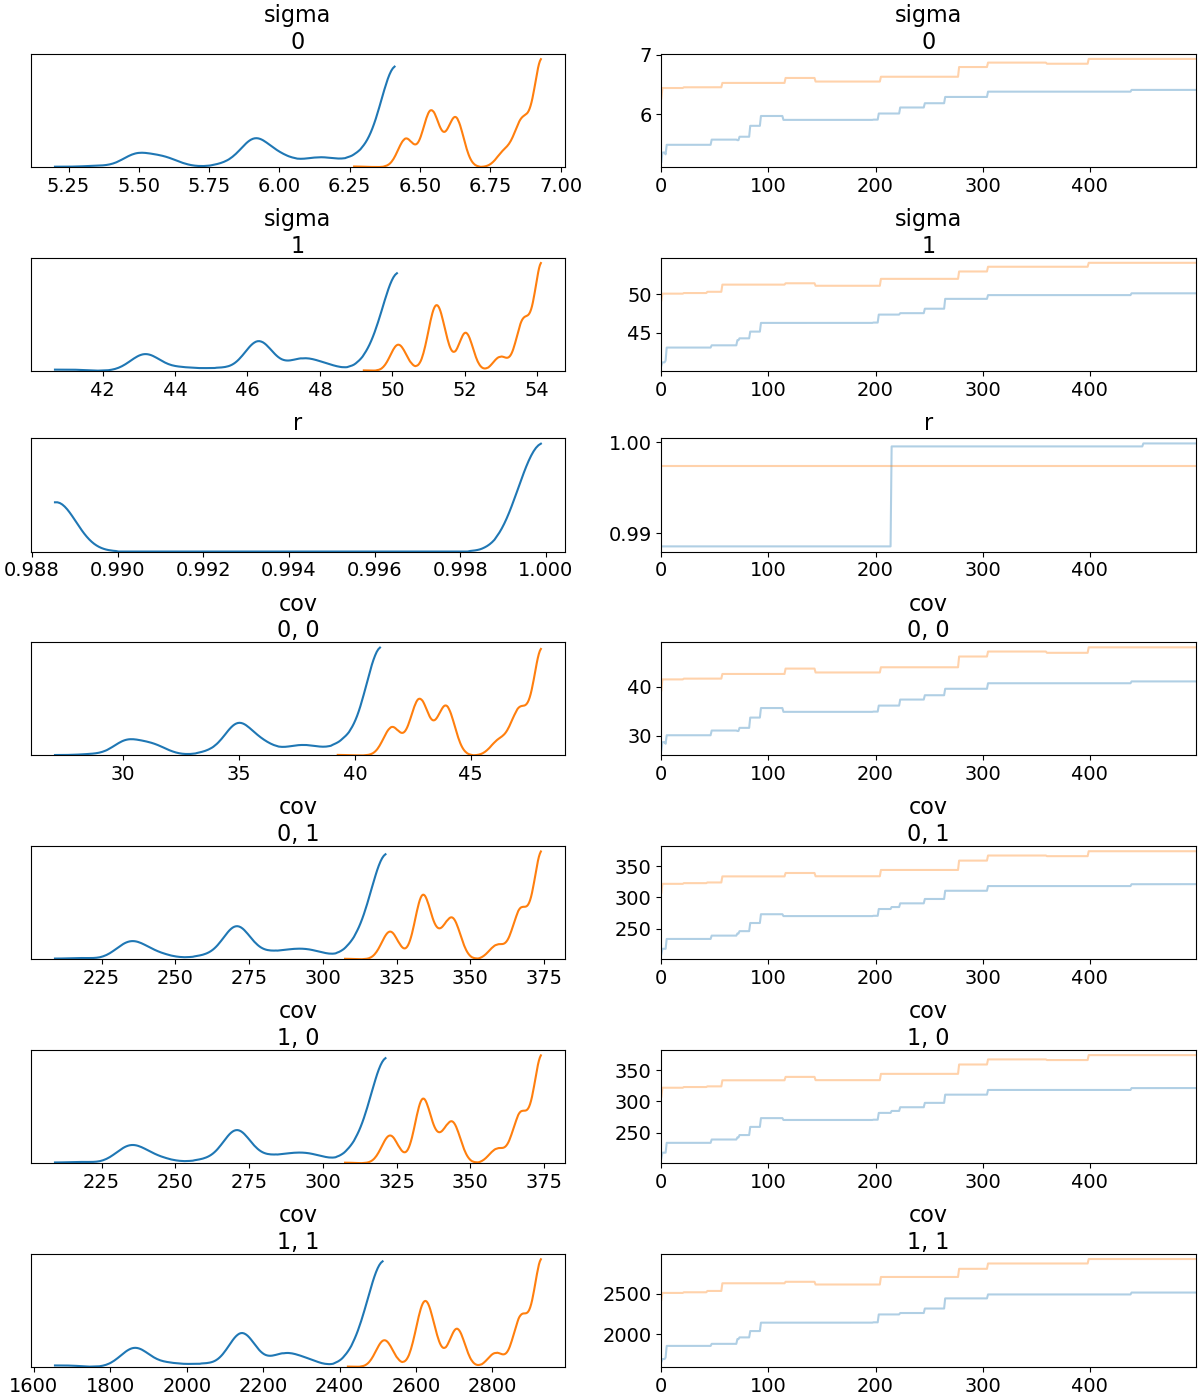

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026748643C48>,
      dtype=object)

In [11]:
pm.traceplot(robust_trace)